In [1]:
import os
import cv2
import math
import random as rn
import numpy as np

import mediapipe as mp

import matplotlib.pyplot as plt
import plotly.express as px

import seaborn as sns
import pandas as pd

plt.style.use("seaborn-v0_8-dark")
plt.rcParams["font.family"] = "monospace"

In [2]:
CLASS = ["Open Palm", "Peace Sign", "Rock On", "OK Sign","NOK Sign"]
DATA_DIR = r"C:\Users\serce\Desktop\ml_project\data\training"
DESIRED_HEIGHT = 480
DESIRED_WIDTH = 480

rn.seed(42)

In [3]:
def resize(image, DESIRED_HEIGHT, DESIRED_WIDTH):
    """
    Resize the image to the desired height and width.
    
    Parameters:
    - image: np.ndarray
        The image to be resized.
        
    - DESIRED_HEIGHT: int
        The desired height of the image.
        
    - DESIRED_WIDTH: int
        The desired width of the image.
        
    Returns:
    - image: np.ndarray
        The resized image.
    """
    H, W = image.shape[:2]
    if H < W:       # Portrait
        image = cv2.resize(image, (DESIRED_WIDTH, math.floor(H / (W / DESIRED_WIDTH))))
    else:
        image = cv2.resize(image, (math.floor(W / (H / DESIRED_HEIGHT)), DESIRED_HEIGHT))
    return image

In [4]:
HANDS = mp.solutions.hands.Hands(
    static_image_mode=True,
    max_num_hands=1,
    min_detection_confidence=0.5
)
DRAW = mp.solutions.drawing_utils

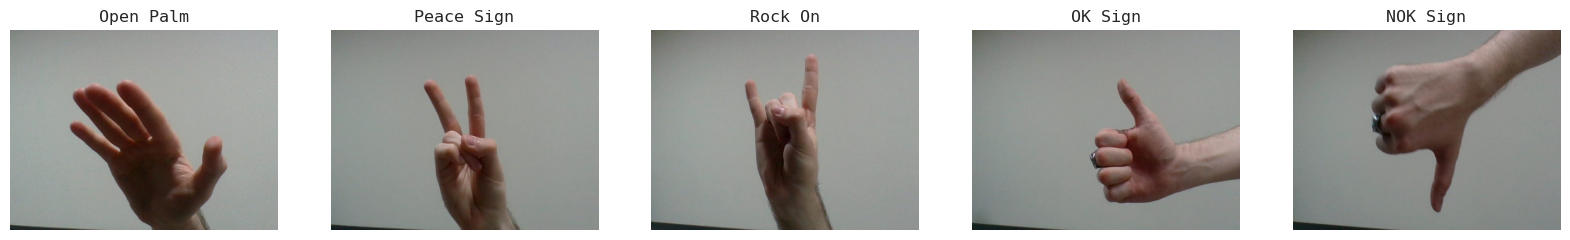

In [5]:
# Visualize 1 image from each class
fig, ax = plt.subplots(1, 5, figsize=(20, 4))
for i, cls in enumerate(CLASS):
    img = cv2.imread(os.path.join(DATA_DIR, cls, rn.choice(os.listdir(os.path.join(DATA_DIR, cls)))))
    img = resize(img, DESIRED_HEIGHT, DESIRED_WIDTH)
    ax[i].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    ax[i].set_title(cls)
    ax[i].axis("off")

d:\anaconda3\envs\slave\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


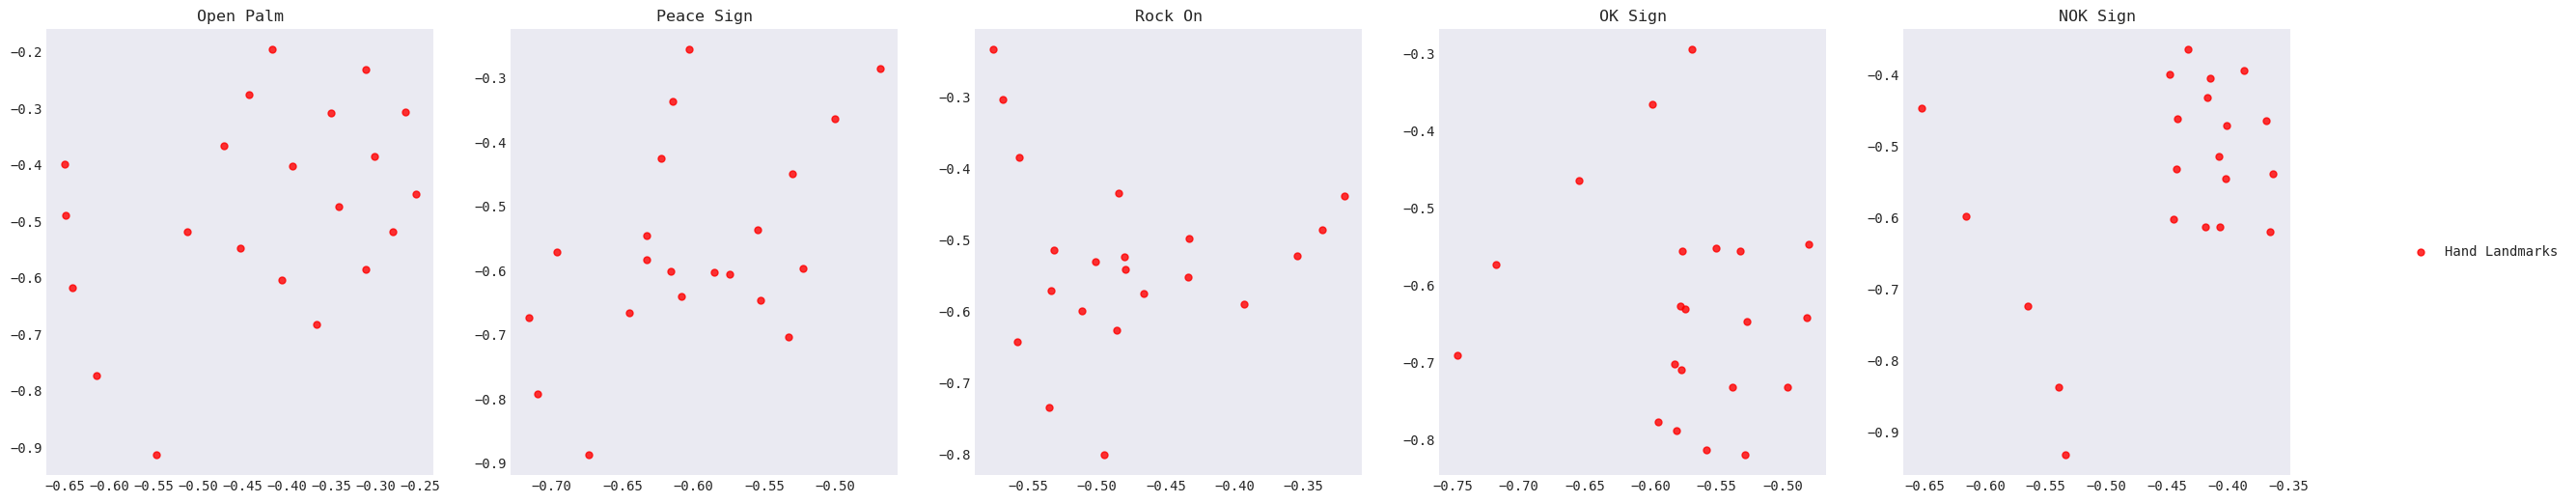

In [6]:
# Visualize the landmarks as a scatter plot
fig, ax = plt.subplots(1, 5, figsize=(30, 6))
for i, cls in enumerate(CLASS):
    img = cv2.imread(os.path.join(DATA_DIR, cls, rn.choice(os.listdir(os.path.join(DATA_DIR, cls)))))
    img = resize(img, DESIRED_HEIGHT, DESIRED_WIDTH)
    results = HANDS.process(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    if results.multi_hand_landmarks:
        for hand_landmarks in results.multi_hand_landmarks:
            x = [-landmark.x for landmark in hand_landmarks.landmark]
            y = [-landmark.y for landmark in hand_landmarks.landmark]
            ax[i].scatter(
                x,
                y,
                s=25,
                c="r",
                alpha=0.8,
                label="Hand Landmarks",
                zorder=2
            )
    ax[i].set_title(cls)
# Add 1 legend outside the subplots
fig.legend(
    *ax[0].get_legend_handles_labels(),
    loc="center right",
    borderaxespad=1,
);

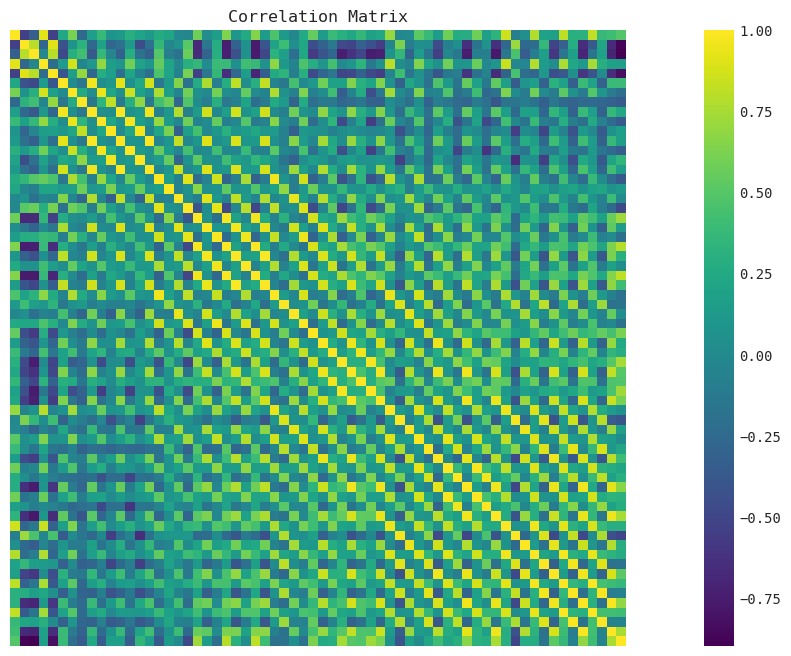

In [27]:
# Inspect the .csv file
data = pd.read_csv(r'C:\Users\serce\Desktop\ml_project\data\hand_landmarks.csv')
data.head()

# Create a heatmap of the correlation matrix (no fmt)
plt.figure(figsize=(20, 8));
sns.heatmap(data.corr(), annot=False, cmap="viridis", square=True, cbar=True);
plt.title("Correlation Matrix");
plt.xticks([]);
plt.yticks([]);
plt.show()

In [6]:
TEST_PATH = r'C:\Users\serce\Desktop\ml_project\test'
images = [cv2.imread(os.path.join(TEST_PATH, img)) for img in os.listdir(TEST_PATH)]
len(images)

18

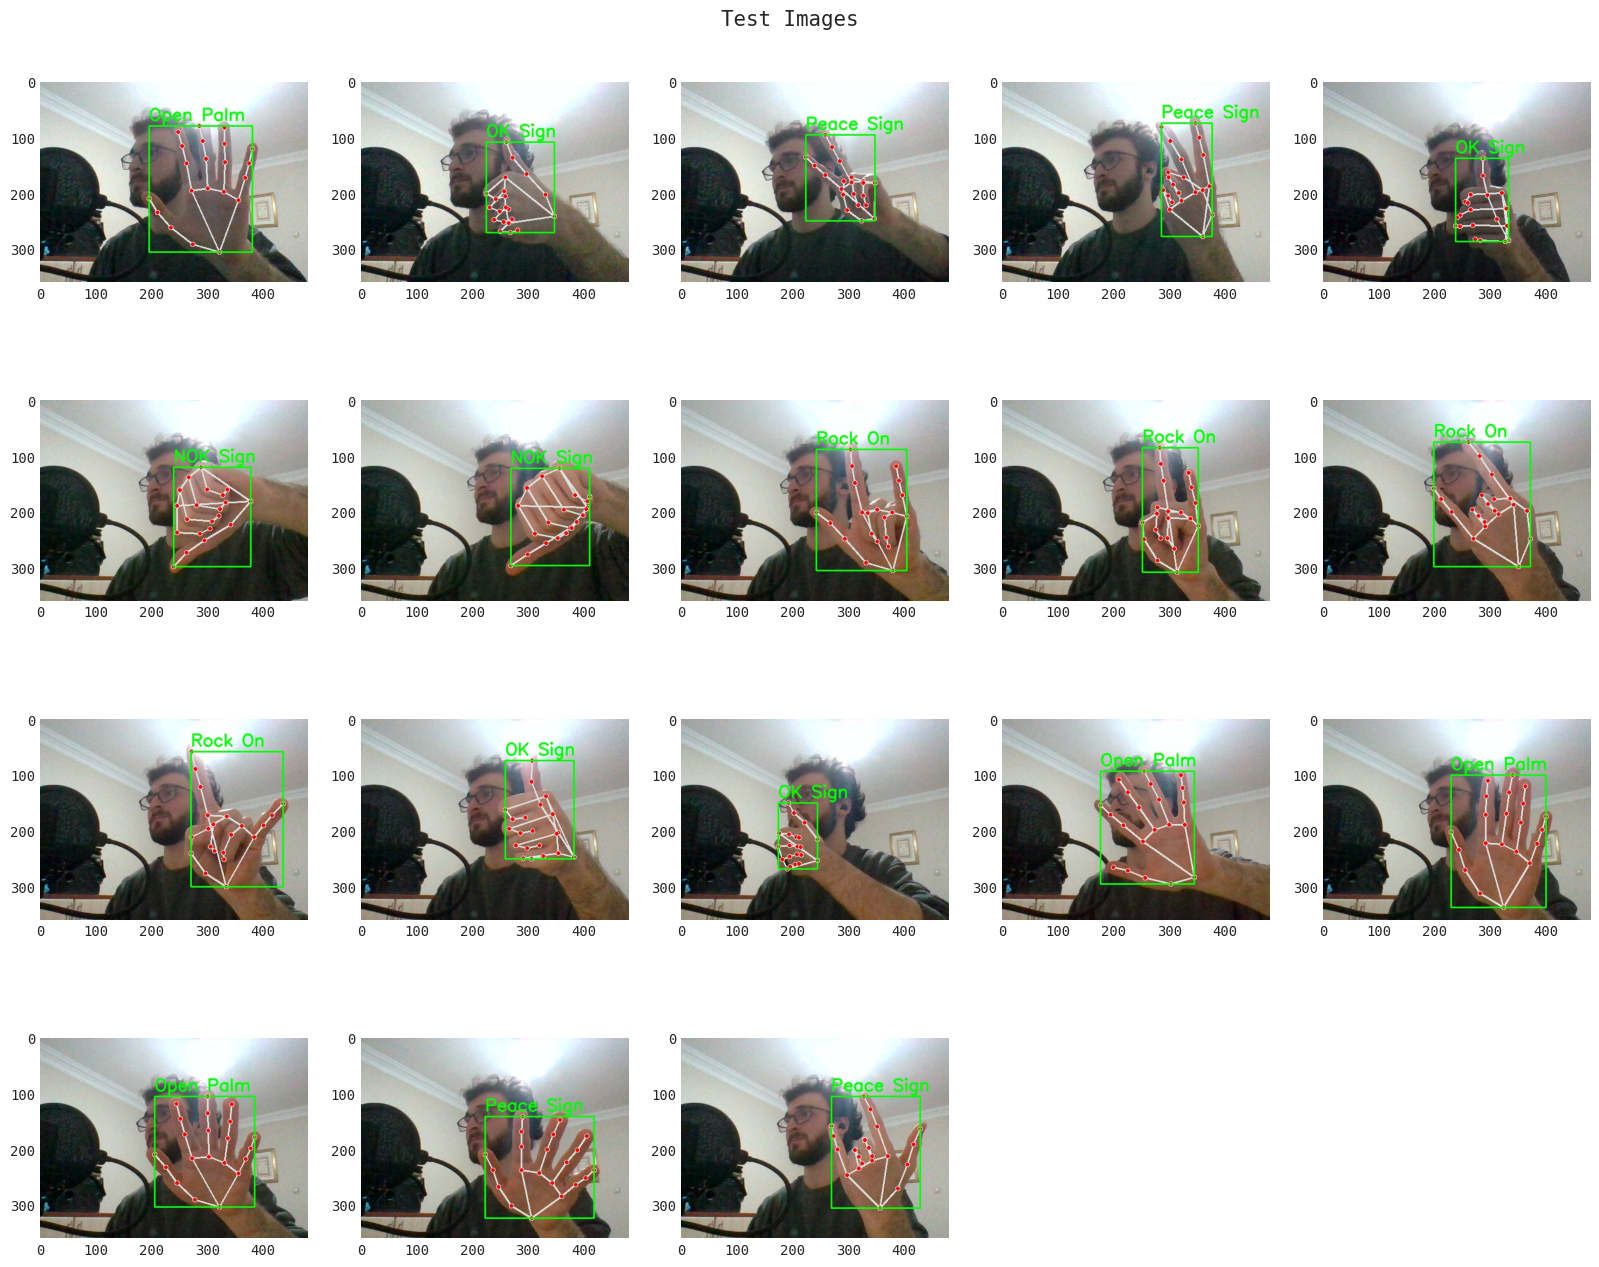

In [19]:
plt.figure(figsize=(20, 20))
for i, img in enumerate(images):
    plt.subplot(5, 5, i + 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.suptitle("Test Images", fontsize=15, y=0.9)
    # Add predicted labels as titles